<a href="https://colab.research.google.com/github/Manav-Khandurie/Breast-Cancer-ML-Models/blob/main/BreastCancerMLModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction
This notebook contains code for all the models used for project

# Data Collection
The dataset used in this analysis is present at
https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/code

In [ ]:
# Sample Code for Data PreProcessing

# Exploratory Data Analysis (EDA)


In [ ]:
# Code logic for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming 'df' is your DataFrame
df = pd.read_csv("/content/sample_data/Breast_Cancer.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


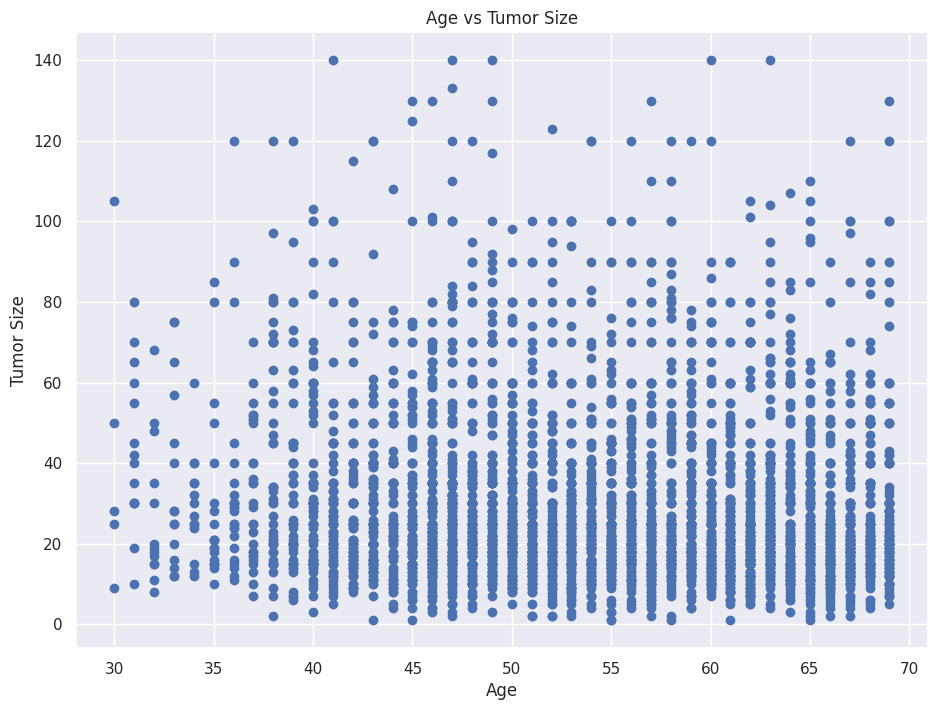

In [ ]:
# @title Age vs Tumor Size

import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['Tumor Size'])
plt.title('Age vs Tumor Size')
plt.xlabel('Age')
_ = plt.ylabel('Tumor Size')

<Axes: xlabel='Tumor Size', ylabel='Survival Months'>

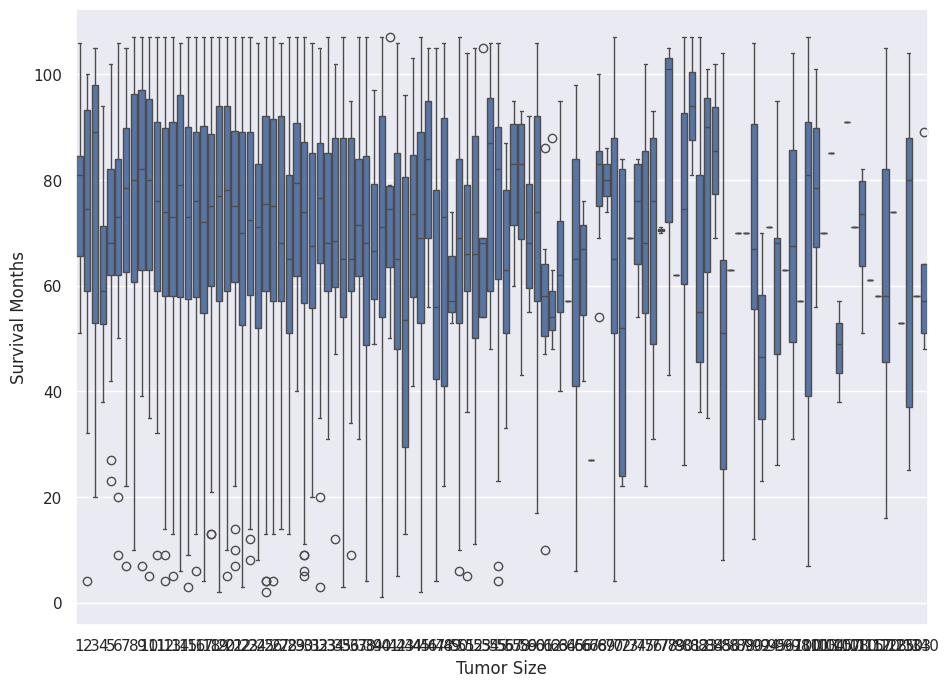

In [ ]:
# @title Survival Months by Tumor Size

sns.boxplot(x = 'Tumor Size', y = 'Survival Months', data=df)

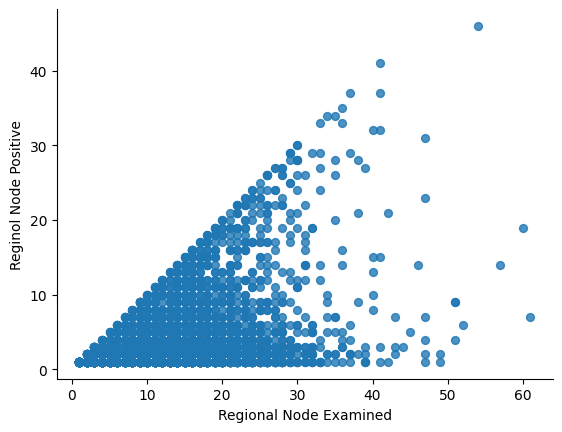

In [ ]:

df.plot(kind='scatter', x='Regional Node Examined', y='Reginol Node Positive', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

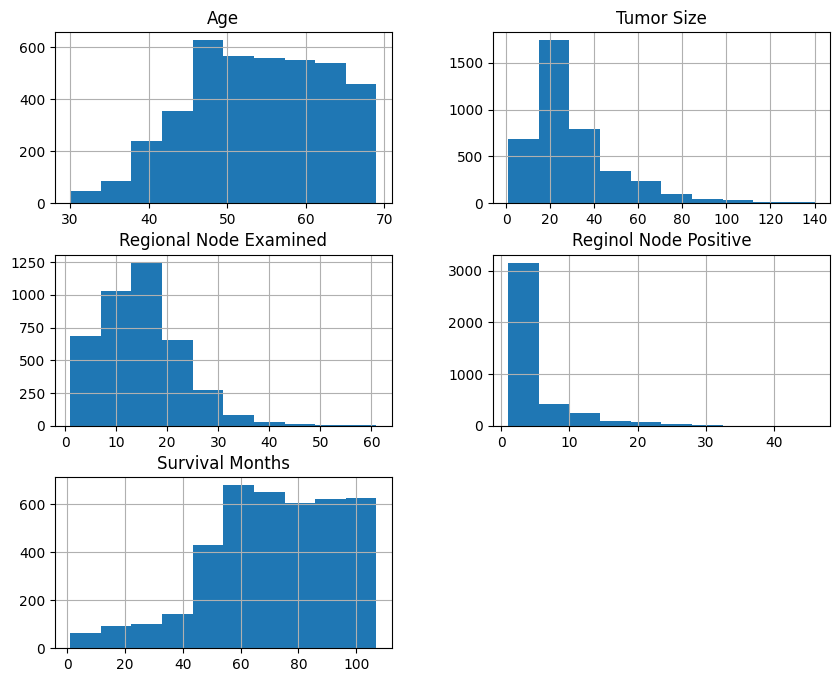

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

<ipython-input-12-7b324e919061>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


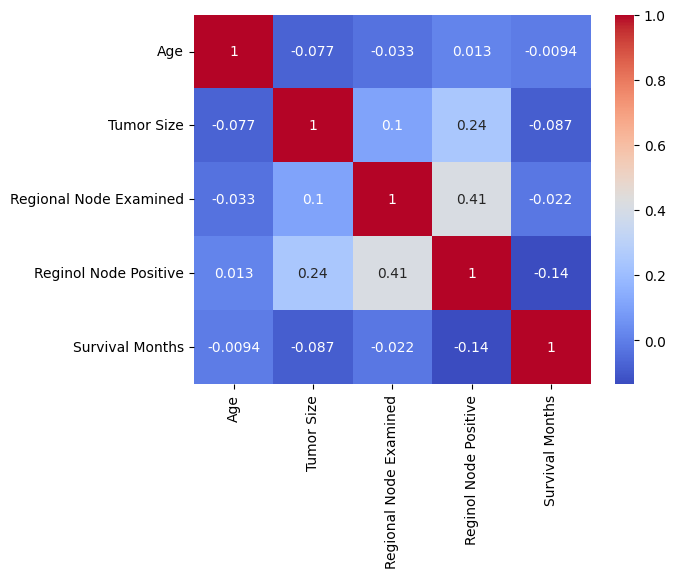

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

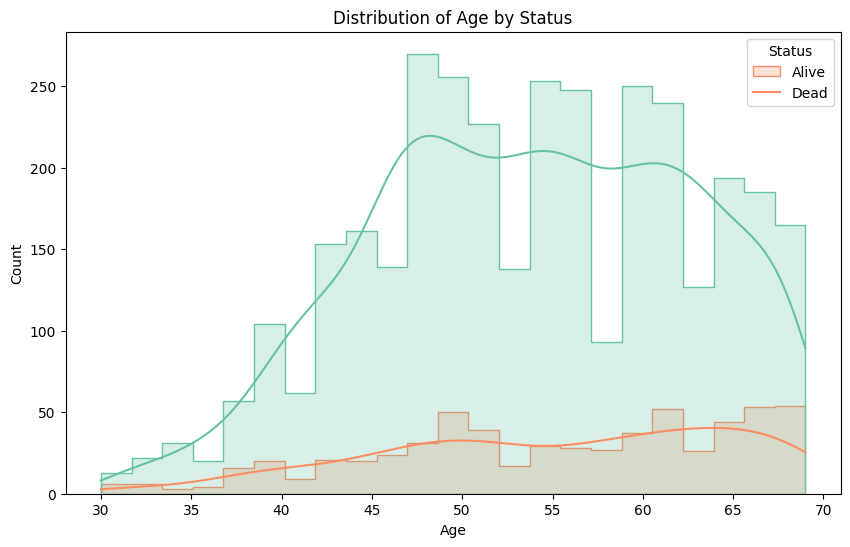

In [ ]:
# Plot the distribution (histogram or kernel density estimate) for Age by Status
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Age', hue='Status', kde=True, palette='Set2', element='step', common_norm=False)
plt.title('Distribution of Age by Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Alive', 'Dead'])

plt.show()

# Data PreProcessing

## One-Hot Enchoding Technique

In [ ]:
# Pre-processing steps
df.rename(columns={"T Stage ": "T Stage"}, inplace=True)
df["Grade"].replace({" anaplastic; Grade IV": "4"}, inplace=True)
df["Grade"] = df["Grade"].astype(int)
df["T Stage"].replace({"T1":1, "T2": 2, "T3":3, "T4": 4}, inplace=True)
df["N Stage"].replace({"N1":1, "N2": 2, "N3":3}, inplace=True)
df["6th Stage"].replace({"IIA":1, "IIB": 2, "IIIA":3, "IIIB": 4,"IIIC":5}, inplace=True)
df["differentiate"].replace({"Moderately differentiated": 2,
                            "Poorly differentiated": 1,
                            "Well differentiated": 3,
                            "Undifferentiated": 0}, inplace=True)
df["A Stage"].replace({"Regional":1, "Distant": 0}, inplace=True)
df["Estrogen Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
df["Progesterone Status"].replace({"Positive":1, "Negative": 0}, inplace=True)
df["Status"].replace({"Alive":1, "Dead": 0}, inplace=True)

# Specify the columns to one-hot encode
columns_to_encode = ["Race", "Marital Status"]

# Perform one-hot encoding using pd.get_dummies()
df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

In [ ]:
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,...,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,68,1,1,1,1,3,1,4,1,1,...,60,1,0,0,1,0,1,0,0,0
1,50,2,2,3,2,2,1,35,1,1,...,62,1,0,0,1,0,1,0,0,0
2,58,3,3,5,2,2,1,63,1,1,...,75,1,0,0,1,1,0,0,0,0
3,58,1,1,1,1,3,1,18,1,1,...,84,1,0,0,1,0,1,0,0,0
4,47,2,1,2,1,3,1,41,1,1,...,50,1,0,0,1,0,1,0,0,0


# **Model Training**

## **Data - Spliting**

In [ ]:
import pandas as pd

features = df.drop(columns=['Status'])
target = df['Status']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## **Random Forests**

### RFC Model Trainning - No Tuning

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import time

start_time=time.time()
# Initialize Random Forest classifier without hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
end_time=time.time();
total_time=end_time-start_time;

# Make predictions on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_auc_roc = roc_auc_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"AUC-ROC Score: {rf_auc_roc}")
print(f'Training Time: {total_time}');



Random Forest Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.9167701863354037
Precision: 0.9221311475409836
Recall: 0.9854014598540146
F1 Score: 0.9527170077628794
AUC-ROC Score: 0.7552007299270073
Training Time: 0.48227620124816895




```
# This is formatted as code
```

### RFC Model Trainning - HyperParameter Tuning

In [ ]:
import joblib
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

start_time=time.time()


# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time=time.time();
total_time=end_time-start_time;


# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_auc_roc = roc_auc_score(y_test, best_predictions)

# Print evaluation metrics
print("\nRandom Forest Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}');


# Save the trained model as a joblib file
joblib.dump(best_estimator, 'RFC-Model.joblib')


Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.9204968944099379
Precision: 0.921302578018996
Recall: 0.9912408759124087
F1 Score: 0.9549929676511953
AUC-ROC Score: 0.7539537712895377
Training Time: 176.9732780456543


['RFC-Model.joblib']

## **SVM**

### SVM Model Trainning - No Tuning

In [ ]:
from sklearn.svm import SVC
import time
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


start_time = time.time()

# Initialize SVM classifier without hyperparameter tuning
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

# Make predictions on the testing set
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_auc_roc = roc_auc_score(y_test, svm_predictions)

# Print evaluation metrics
print("SVM Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"AUC-ROC Score: {svm_auc_roc}")
print(f'Training Time: {total_time}')


SVM Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.8944099378881988
Precision: 0.898936170212766
Recall: 0.9868613138686131
F1 Score: 0.940848990953375
AUC-ROC Score: 0.6767639902676399
Training Time: 0.3551957607269287


### SVM Model Trainning - HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

start_time = time.time()

# Define the reduced hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize SVM classifier
svm_model = SVC(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time = time.time()
total_time = end_time - start_time

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_auc_roc = roc_auc_score(y_test, best_predictions)

# Print evaluation metrics
print("\nSVM Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}')

# Save the trained model as a joblib file
joblib.dump(best_estimator, 'SVM-Model.joblib')


Best Hyperparameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

SVM Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.8968944099378882
Precision: 0.903485254691689
Recall: 0.983941605839416
F1 Score: 0.9419986023759609
AUC-ROC Score: 0.691970802919708
Training Time: 122.48483419418335


['SVM-Model.joblib']

## **KNN**

### KNN Model Trainning - No Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time

start_time = time.time()

# Initialize KNN classifier without hyperparameter tuning
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

# Make predictions on the testing set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_auc_roc = roc_auc_score(y_test, knn_predictions)

# Print evaluation metrics
print("KNN Classifier Evaluation without Hyperparameter Tuning:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"AUC-ROC Score: {knn_auc_roc}")
print(f'Training Time: {total_time}')


KNN Classifier Evaluation without Hyperparameter Tuning:
Accuracy: 0.8881987577639752
Precision: 0.9092159559834938
Recall: 0.964963503649635
F1 Score: 0.9362606232294618
AUC-ROC Score: 0.7074817518248174
Training Time: 0.0035331249237060547


### KNN Model Trainning - HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

# Define the hyperparameters grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

end_time = time.time()
total_time = end_time - start_time

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the testing set using the best estimator
best_predictions = best_estimator.predict(X_test)

# Evaluate the model with best parameters
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_auc_roc = roc_auc_score(y_test, best_predictions)

# Print evaluation metrics
print("\nKNN Classifier with Best Hyperparameters Evaluation:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1 Score: {best_f1}")
print(f"AUC-ROC Score: {best_auc_roc}")
print(f'Training Time: {total_time}')

# Save the trained model as a joblib file
joblib.dump(best_estimator, 'KNN-Model.joblib')


Best Hyperparameters:
{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

KNN Classifier with Best Hyperparameters Evaluation:
Accuracy: 0.8956521739130435
Precision: 0.9077340569877883
Recall: 0.9766423357664233
F1 Score: 0.9409282700421941
AUC-ROC Score: 0.7049878345498783
Training Time: 22.801394939422607


['KNN-Model.joblib']

## **XGB**

### XGB Model Trainning - No Tuning

### XGB Model Trainning - HyperParameter Tuning

# Model Testing

In [ ]:
#Sample code for Model Testing

# Results & Observations

In [ ]:
# Sample Results

# Rough Work

``1)Introduction``

2)``Brief overview of cancer-related diseases and the importance of early detection``.
	--> Introducing the breast cancer dataset

3)```Data Collection and Preprocessing``
	--> Data Cleaning
	--> One Hot Echoding
	--> Other methods for preprocessing

4)``Exploratory Data Analysis (EDA)``
	--> Showing Vizulizations b/w different variables
	--> Common Patterns and Trend

5)``Feature Selection and Engineering``
	--> Techniques used for feature selection and engineering to improve model performance. Brief overview
	--> Importance of selecting relevant features for disease detection.

6)``Machine Learning Models``
	--> Alogo 1 [ DTC Classifer ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 2 [ SVM ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 3 [ Random Forests Classifer ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

	--> Alogo 4 [ Neural  Networks ]
		* Mathematical Intution
		* Code Implementation in Python sklearn
		* Key advantages and disadvantages
		* Hyperparameter-Tuning

7)``Model Evaluation``
	--> Code implementation using python sklearn
	--> Comparasion using Accuracy , Precison , Recall , F1-Score
	--> Visualization b/w different findings


8) ``Finding and Conclusion``

9) ``Future Contributions``

10) ``Refrences``

``

In [ ]:
# Sample code for Model Training

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing models after importing
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)
log_reg = LogisticRegression(max_iter=10000, random_state=42)
knn = KNeighborsClassifier()

# Training models
random_forest.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Predictions
rf_predictions = random_forest.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
log_reg_predictions = log_reg.predict(X_test)
knn_predictions = knn.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Recall:", recall_score(y_test, rf_predictions))

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Recall:", recall_score(y_test, xgb_predictions))

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Logistic Regression Recall:", recall_score(y_test, log_reg_predictions))

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Recall:", recall_score(y_test, knn_predictions))

Random Forest Accuracy: 0.9649122807017544
Random Forest Recall: 0.9859154929577465
XGBoost Accuracy: 0.956140350877193
XGBoost Recall: 0.971830985915493
Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Recall: 0.9859154929577465
KNN Accuracy: 0.9473684210526315
KNN Recall: 0.9577464788732394


## **Sample**

### Sample Model Trainning - No Tuning

### Sample Model Trainning - HyperParameter Tuning